In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

In [ ]:
print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 1.5.3
Versão do numpy: 1.23.5
Versão do scikit-learn (sklearn): 1.2.2
Versão do seaborn: 0.12.2
Versão do yellowbrick: 1.5


In [ ]:
x = np.array([-3,-2,-1,0,1,2,3,4,5])
y = x * x - 2 * x + 4
plt.plot(x,y, 'o--k', linewidth=2, markersize=7, label='funcao')
plt.title('Gráfico Bonito')
plt.xlabel('eixo x')
plt.ylabel('eixo y = $x^2 - 2x + 4$')
plt.xlim([-5,6])
plt.ylim([0,20])
plt.legend()

In [ ]:
x = np.linspace(-3,5,1000)
y = x * x - 2 * x + 4
z = x**3 - 3 * x + 10

plt.rcParams.update({'font.size':14})

plt.plot(x,y, '--k', linewidth=2, label='parábola = x^2 - 2x + 4')
plt.plot(x,z, '-r', linewidth=2, label='função cúbica = x^3 - 3x + 10')
plt.title('Gráfico com 2 curvas')
plt.xlabel('eixo x')
plt.ylabel('eixo y = FUNCAO')
plt.xlim([-5,6])
plt.ylim([0,20])
#plt.legend(loc=4)
plt.legend(bbox_to_anchor=(1.04,1))

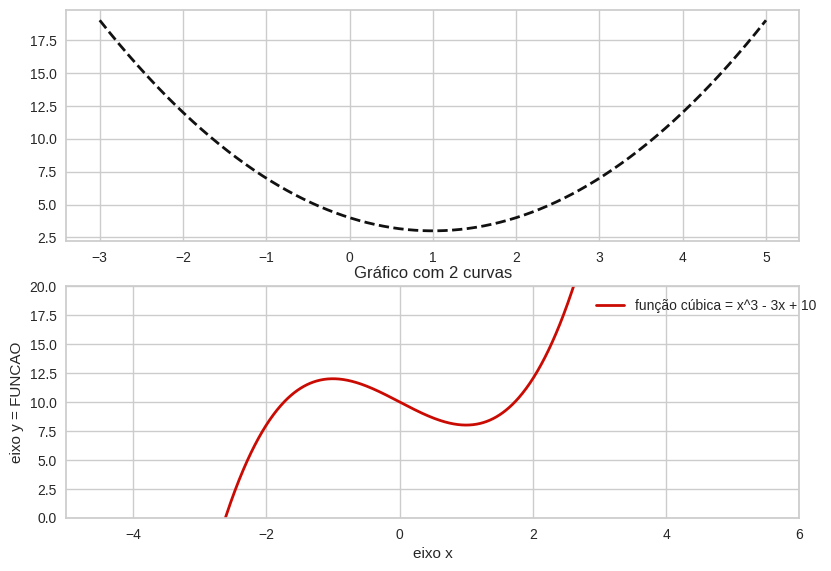

In [ ]:
x = np.linspace(-3,5,1000)
y = x * x - 2 * x + 4
z = x**3 - 3 * x + 10

plt.rcParams.update({'font.size':14})

plt.subplot(2,1,1)
plt.plot(x,y, '--k', linewidth=2, label='parábola = x^2 - 2x + 4')
plt.tight_layout()
plt.subplot(2,1,2)
plt.plot(x,z, '-r', linewidth=2, label='função cúbica = x^3 - 3x + 10')
plt.title('Gráfico com 2 curvas')
plt.xlabel('eixo x')
plt.ylabel('eixo y = FUNCAO')
plt.xlim([-5,6])
plt.ylim([0,20])
#plt.legend(loc=4)
plt.legend(bbox_to_anchor=(1.04,1))

In [ ]:
dados = pd.read_csv('/content/train.csv', delimiter=',')

In [ ]:
dados.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dados = dados.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [ ]:
dados.shape

(891, 9)

In [ ]:
dados.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [ ]:
dados = dados.dropna()

In [ ]:
dados.shape

(712, 9)

In [ ]:
X = dados.drop(['Survived'], axis = 1)
y = dados['Survived']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

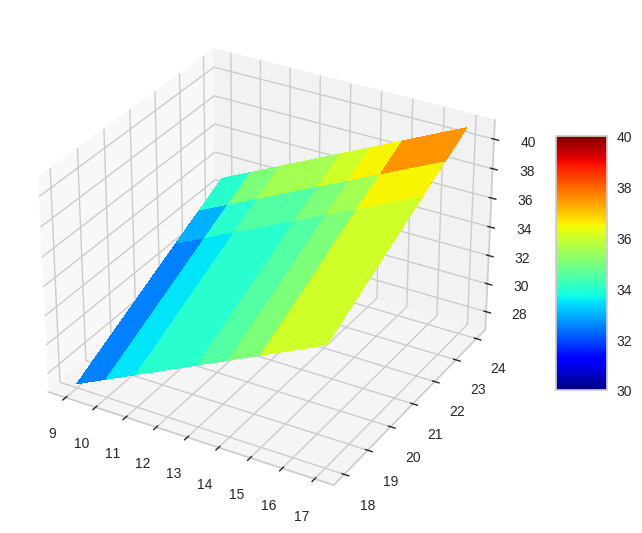

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#x = np.linspace(-1,1,100)
#y = np.linspace(-1,1,100)
x = dados['dens_mediana'][1:100,]
y = dados['dens_geral'][1:100,]

X, Y = np.meshgrid(x, y)
#Z = X**2 - Y**2
Z = X + Y
#Z = dados['soma'][1:100]
fig = plt.figure()

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0, antialiased=False)

#ax.set_zlim(0,1)
#ax.view_init(elev=45, azim=30)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()

In [ ]:
dados = pd.read_csv('train.csv')
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dados = dados.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Avaliando dados NUMÉRICOS

In [ ]:
dados.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Avaliando dados CATEGÓRICOS

In [ ]:
dados.describe(include='O')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


# Checando valores NA

In [ ]:
dados.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
dados.shape

(891, 9)

In [ ]:
#filtered_df = dados[dados['Age'].notnull()]
dados_Age_nao_preenchidos = dados[dados['Age'].isna()]
dados_Cabin_nao_preenchidos = dados[dados['Cabin'].isna()]
dados_Embarked_nao_preenchidos = dados[dados['Embarked'].isna()]

print(
    dados_Age_nao_preenchidos.shape,
    dados_Cabin_nao_preenchidos.shape,
    dados_Embarked_nao_preenchidos.shape)

(177, 9) (687, 9) (2, 9)


In [ ]:
dados_Age_nao_preenchidos.describe(include='O')

,Sex,Cabin,Embarked
count,177,19,177
unique,2,19,3
top,male,B78,S
freq,124,1,90


In [ ]:
dados_Age_nao_preenchidos.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [ ]:
dados_Age_nao_preenchidos.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       158
Embarked      0
dtype: int64

AttributeError: 'DataFrame' object has no attribute 'column_name'